<a href="https://colab.research.google.com/github/Emmixert/Hands-On-De-ML-210111820-/blob/main/Tutorial_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción
Una regresion lineal es un método de estadistica utilzado para modelar la relación entre una variable dependiente (lo que quieres predecir) y una o más variables independientes (los factores que influyen la variable dependiente). Esencialmente, intenta encontrar la mejor linea recta posible que describa como la variable dependiente cambia conforme las variables independientes cambien, es utilizado comúnmente para predicciones y pronosticos.

## Librerias

Primero antes de programar, introduciremos las librerias requeridas para poder realizar la regresion lineal.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Pandas:** Liberia que nos permitirá importar datasets de la web, sin necesidad de realizar descargas o tenerlo localmente a la mano.

**Sklearn:** Librería esencial, es donde nuestro programa entrenará a hacer machine learning.

**Matplotlib:** Librería que utilizaremos para graficar nuestros resultados.

**Seaborn**: Librería opcional que complementa matplotlib, crea diseños más sofisticados a nuestras graficas.

## Data loading

Empezamos cargando nuestro dataset, para este ejemplo, utilizaremos el famoso dataset del California Housing Train.


In [2]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Data exploration

En el siguiente paso, verificaremos que trabajamos con un dataset limpio, utilizando el siguiente código, podremos visualizar que contiene y que le falta a nuestro dataset.


In [3]:
df.info()
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


## Data preprocessing

### Subtask:
Prepararemos los datos para la regresión lineal, identificando el target y utilizando el StandardScaler.


In [5]:
features = df.drop('median_house_value', axis=1)
target = df['median_house_value']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df[features.columns] = scaled_features
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,66900.0
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,80100.0
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,85700.0
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,73400.0
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,65500.0


## Model building

Ahora empezamos a contruir y entrenar nuestra regresion lineal, utilizando Sckikit Learn.

In [6]:
model = LinearRegression()
model.fit(df[features.columns], target)

LinearRegression()

## Model evaluation
A continuación, introducimos codigo para evaluar como le fue a nuestro modelo de regresión lineal, utilizando MSE y R-Squared.

In [7]:
predictions = model.predict(df[features.columns])

mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 4824523173.93
R-squared (R2) Score: 0.64


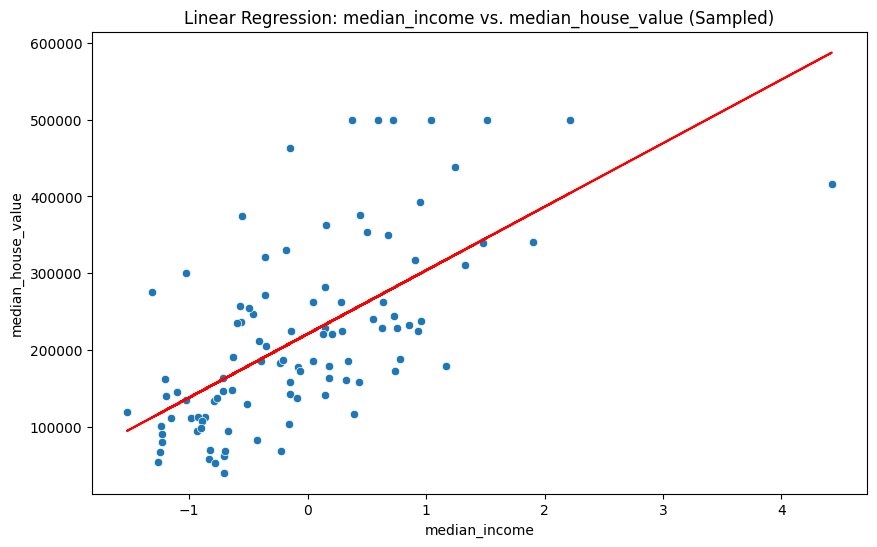

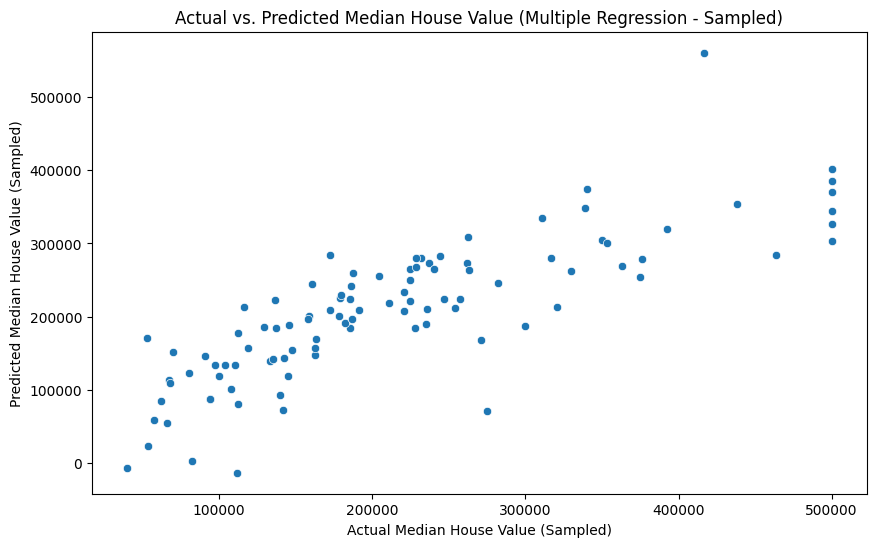

In [8]:
# Choose one feature to visualize against the target
feature_to_visualize = 'median_income'

# Take a random sample of 50 data points for visualization
sample_df = df.sample(n=100, random_state=42)
sample_target = target.loc[sample_df.index]

# Create a scatter plot of the chosen feature and the target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sample_df[feature_to_visualize], y=sample_target)

# To plot the regression line against a single feature, we will perform a simple linear regression
# on that single feature for visualization purposes only.
feature_for_single_regression = sample_df[[feature_to_visualize]]

# Scale the single feature for the visualization model
single_feature_scaler = StandardScaler()
scaled_feature_for_single_regression = single_feature_scaler.fit_transform(feature_for_single_regression)

single_feature_model = LinearRegression()
single_feature_model.fit(scaled_feature_for_single_regression, sample_target)
single_feature_predictions = single_feature_model.predict(scaled_feature_for_single_regression)

# Plot the regression line using the original feature values and predicted target values
plt.plot(sample_df[feature_to_visualize], single_feature_predictions, color='red')
plt.xlabel(feature_to_visualize)
plt.ylabel("median_house_value")
plt.title(f"Linear Regression: {feature_to_visualize} vs. median_house_value (Sampled)")
plt.show()

# Also visualize the actual vs predicted values from the multiple linear regression model
# Use the sampled data for this plot as well
sample_predictions = model.predict(sample_df[features.columns])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=sample_target, y=sample_predictions)
plt.xlabel("Actual Median House Value (Sampled)")
plt.ylabel("Predicted Median House Value (Sampled)")
plt.title("Actual vs. Predicted Median House Value (Multiple Regression - Sampled)")
plt.show()